In [1]:
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath('getters/'))
sys.path.append(os.path.dirname(SCRIPT_DIR))

In [2]:
import pandas as pd
from getters.get_data import GetExpectedInflation, GetInteresRate
import getters.urls_dict as u

### Carregando dados da inflação esperada através de scraping

In [3]:
    url = u.urls.get('Inflação Esperada')
    headers = u.headers
    get_exp = GetExpectedInflation(url, headers)

    headings, ano, mes, value = get_exp.run()

Scraping url: http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=1693254712&module=M
Approved access


In [4]:
exp = pd.DataFrame(data={'ano':ano,'mes':mes,'valor':value})
exp.rename(columns={'valor':headings[0].split('-')[0]}, inplace=True)

In [5]:
exp.head(15)

,ano,mes,Expectativa média de Inflação
0,2001,07,"6,40"
1,2001,08,"6,57"
2,2001,09,"6,53"
3,2001,10,"6,49"
4,2001,11,"5,57"
5,2001,12,"4,84"
6,2002,01,"4,76"
7,2002,02,"4,70"
8,2002,03,"4,94"
9,2002,04,"4,90"


### Carregando dados do IPCA obtidos através de scraping

In [6]:
FILE = 'IPCA-serie-historica.csv/mes_brasil.csv'

In [7]:
ipca = pd.read_csv('../getters/Data/extracted/'+FILE)

In [8]:
ipca.head()

,ano,mes,indice,variacao_mensal,variacao_trimestral,variacao_semestral,variacao_anual,variacao_doze_meses
0,1979,12,7.618300e-09,NaN,NaN,NaN,NaN,NaN
1,1980,1,8.122300e-09,6.62,NaN,NaN,6.62,NaN
2,1980,2,8.497300e-09,4.62,NaN,NaN,11.54,NaN
3,1980,3,9.010400e-09,6.04,18.27,NaN,18.27,NaN
4,1980,4,9.486700e-09,5.29,16.80,NaN,24.53,NaN


### Carregando dados da taxa de juros básica via scraping

Para gerar este csv, foi executado o arquivo get_data.py, utilizando a rotina python definida no bloco de código abaixo do condicional:

In [9]:
# if __name__=="__main__"

##############################################################

In [10]:
juros = pd.read_csv('../getters/Data/extracted/taxa_de_juros.csv', delimiter=',')

In [11]:
juros.head()

,nº,data,viés,Período de vigência,Meta SELIC,TBAN,Taxa SELIC_%,Taxa SELIC_%_aa
0,245º,16/03/2022,NaN,17/03/2022 -,"11,75",NaN,NaN,NaN
1,244º,02/02/2022,NaN,03/02/2022 - 16/03/2022,"10,75",NaN,"1,13","10,65"
2,243º,08/12/2021,NaN,09/12/2021 - 02/02/2022,"9,25",NaN,"1,40","9,15"
3,242º,27/10/2021,NaN,28/10/2021 - 08/12/2021,"7,75",NaN,"0,82","7,65"
4,241º,22/09/2021,NaN,23/09/2021 - 27/10/2021,"6,25",NaN,"0,57","6,15"


In [12]:
juros = juros[['data','Meta SELIC', 'Taxa SELIC_%', 'Taxa SELIC_%_aa']]
juros['data'] = juros['data'].astype(str)
juros['ano'] = juros['data'].apply(lambda x: x[6:])
juros['mes'] = juros['data'].apply(lambda x: x[3:5])
juros.drop(columns='data', inplace=True)

In [13]:
juros.head()

,Meta SELIC,Taxa SELIC_%,Taxa SELIC_%_aa,ano,mes
0,"11,75",NaN,NaN,2022,03
1,"10,75","1,13","10,65",2022,02
2,"9,25","1,40","9,15",2021,12
3,"7,75","0,82","7,65",2021,10
4,"6,25","0,57","6,15",2021,09


### Iniciando tratamento dos dados

In [14]:
ipca.rename(columns={'variacao_mensal':'variacao_mensal_ipca'}, inplace=True)
ipca = ipca[['ano','mes','indice','variacao_mensal_ipca']]

In [15]:
exp.head()

,ano,mes,Expectativa média de Inflação
0,2001,07,"6,40"
1,2001,08,"6,57"
2,2001,09,"6,53"
3,2001,10,"6,49"
4,2001,11,"5,57"


In [16]:
exp['ano'] = exp['ano'].astype(int)
exp['mes'] = exp['mes'].astype(int)
juros['ano'] = pd.to_numeric(juros.ano)
juros['mes'] = pd.to_numeric(juros.mes)

In [17]:
ipca_exp = ipca.merge(exp, on=['ano','mes'])
ipca_exp_jur = ipca_exp.merge(juros, on=['ano','mes'])

In [18]:
ipca_exp_jur.rename(columns={'Expectativa média de Inflação ':'exp_media_inflacao', 'Meta SELIC': 'meta_selic', 'Taxa SELIC_%': 'taxa_s_%', 'Taxa SELIC_%_aa':'taxa_s_aa'}, inplace=True)

In [19]:
ipca_exp_jur['exp_media_inflacao'] = ipca_exp_jur['exp_media_inflacao'].apply(lambda x: float('.'.join(x.split(','))))
ipca_exp_jur['meta_selic'] = ipca_exp_jur['meta_selic'].apply(lambda x: float('.'.join(x.split(','))))
ipca_exp_jur['taxa_s_%'] = ipca_exp_jur['taxa_s_%'].apply(lambda x: float('.'.join(x.split(','))))
ipca_exp_jur['taxa_s_aa'] = ipca_exp_jur['taxa_s_aa'].apply(lambda x: float('.'.join(x.split(','))))


In [20]:
ipca_exp_jur.head()

,ano,mes,indice,variacao_mensal_ipca,exp_media_inflacao,meta_selic,taxa_s_%,taxa_s_aa
0,2001,7,1756.28,1.33,6.40,19.0,1.74,18.96
1,2001,8,1768.57,0.70,6.57,19.0,1.32,19.04
2,2001,9,1773.52,0.28,6.53,19.0,1.32,19.07
3,2001,10,1788.24,0.83,6.49,19.0,1.60,19.05
4,2001,11,1800.94,0.71,5.57,19.0,1.39,19.05


### Normalizando os períodos para a formulação da regressão a partir da série temporal

In [21]:
ipca_exp_jur['t'] = [i for i in range((len(ipca_exp_jur)-1)*(-1), 1, 1)]

## Criando modelo

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

/home/joao/anaconda3/envs/scraping/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [87]:
X, y = ipca_exp_jur[['variacao_mensal_ipca','exp_media_inflacao', 'meta_selic', 'taxa_s_%', 'taxa_s_aa', 't']], ipca_exp_jur[['indice']]

In [88]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/home/joao/anaconda3/envs/scraping/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [129]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6, learning_rate = 0.3,
                max_depth = 9, alpha = 16, n_estimators = 12)

In [130]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

/home/joao/anaconda3/envs/scraping/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [131]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 331.804132


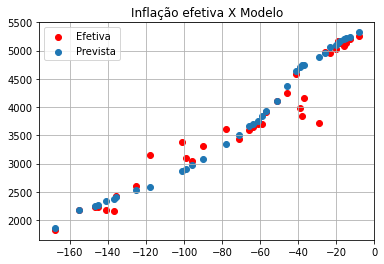

In [132]:
import matplotlib.pyplot as plt

plt.scatter(X_test.t, preds, color='r', label='Efetiva')
plt.scatter(X_test.t,y_test.indice, label='Prevista')
plt.title('Inflação efetiva X Modelo')
plt.grid()
plt.legend()
plt.show()